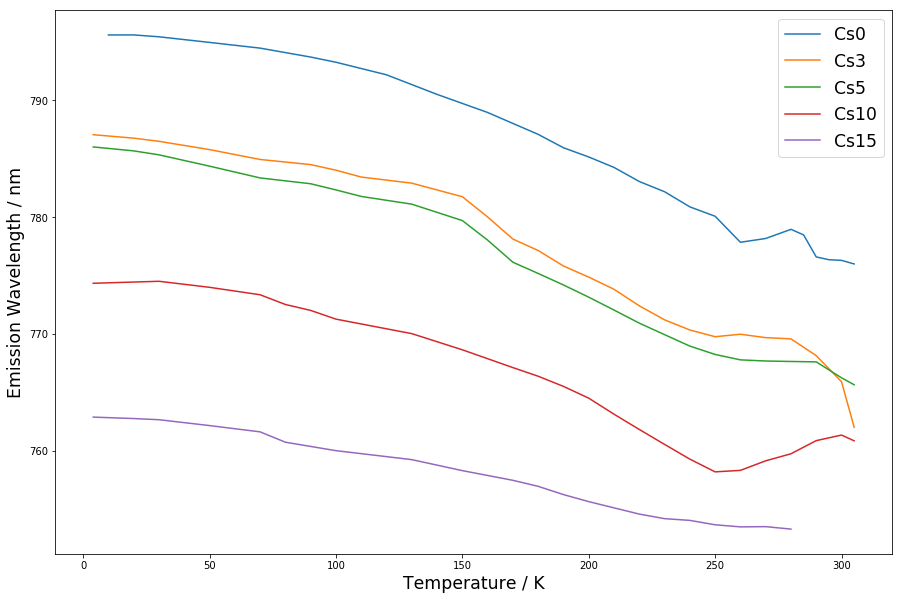

26
26
26
23
24


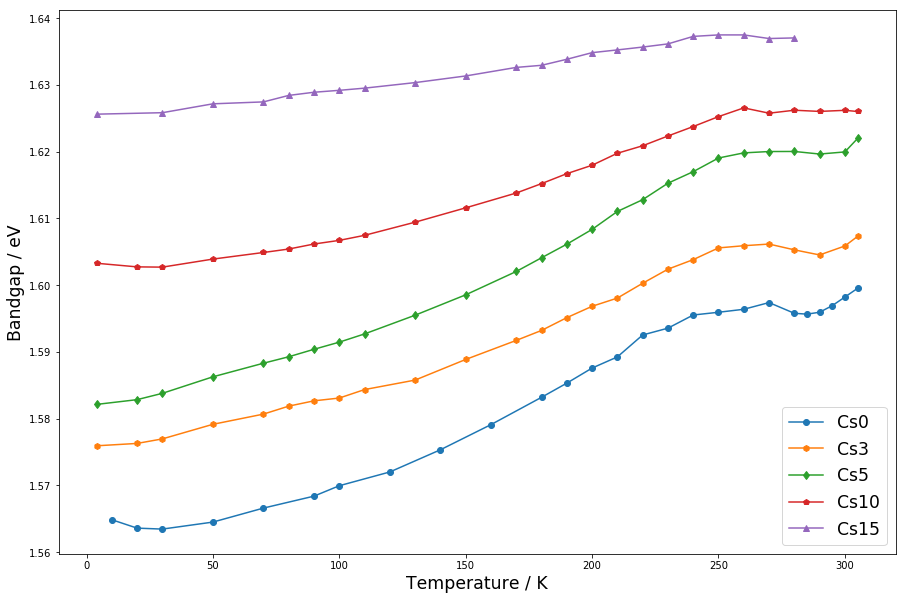

0 =  [0.09007339 0.08433752 0.05002085 0.01867915 0.02235825 0.02736385
 0.01998817 0.01843753 0.00185526 0.         0.00547472 0.0068068
 0.01122    0.01509556 0.01429327 0.02250857 0.03280767 0.06640567
 0.11230856 0.18819609 0.27662716 0.44359815 0.64725878 0.8954201
 0.95785029 1.        ]
10 =  [1.19902904e-01 1.62013244e-01 8.73788774e-02 3.35182566e-02
 1.60302387e-02 6.25506629e-03 1.79093000e-04 0.00000000e+00
 5.37036807e-03 1.10098631e-02 1.90748773e-02 3.19443027e-02
 4.76508104e-02 5.36995349e-02 6.61798826e-02 1.07800980e-01
 1.37741301e-01 2.00504699e-01 2.75412008e-01 3.53636750e-01
 5.01226112e-01 7.18065509e-01 9.24708557e-01 1.00000000e+00]
8 =  [0.00000000e+00 1.95936635e-04 2.96023370e-03 2.42970786e-03
 8.30067588e-03 1.01916466e-02 2.35286603e-02 4.16308376e-02
 5.24432836e-02 5.94679302e-02 8.83867293e-02 1.35082587e-01
 1.57455600e-01 2.15594479e-01 3.00159496e-01 4.22180194e-01
 4.75954059e-01 5.47330275e-01 6.09783185e-01 6.84964711e-01
 8.23887749e-01 9.2918

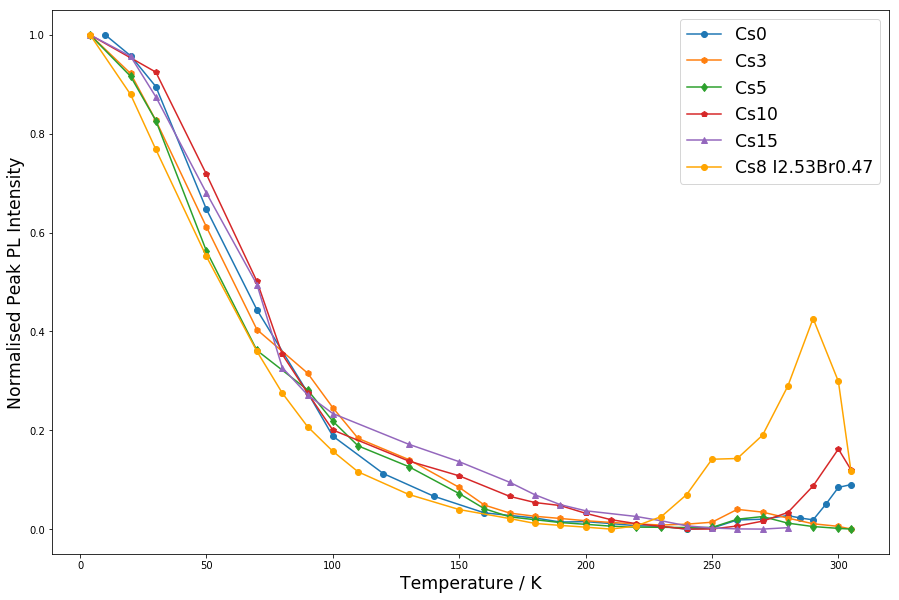

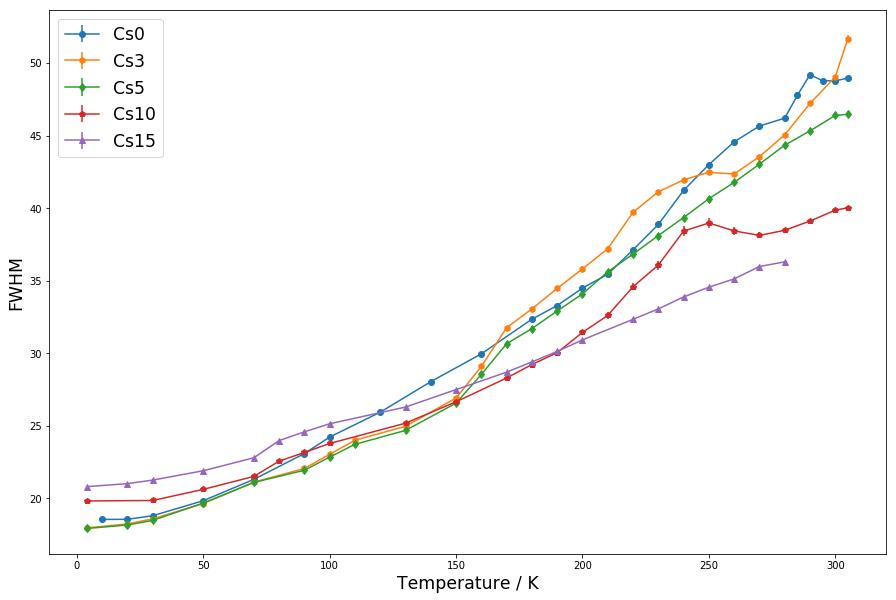

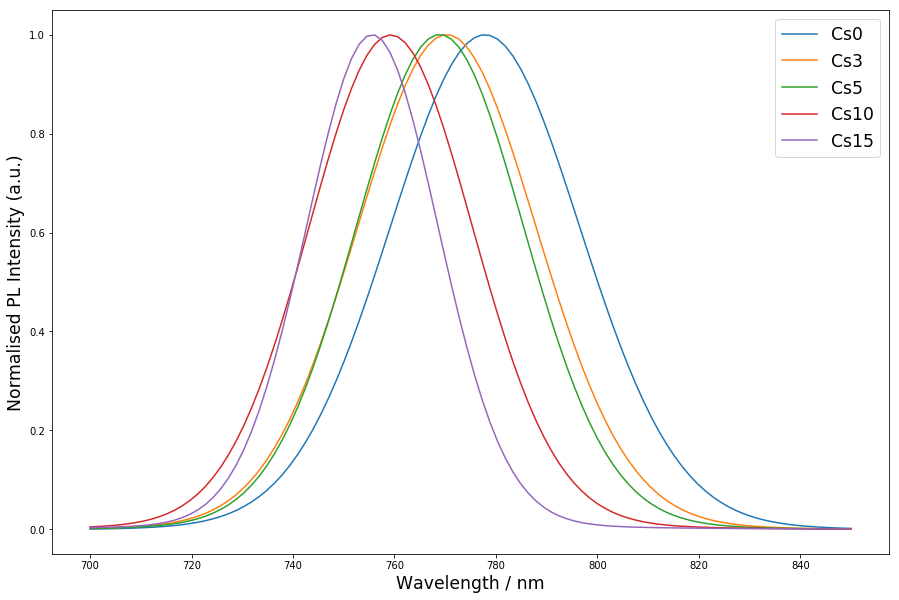

In [162]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (15.0, 10.0)

#load PL data
cs0=np.loadtxt('cs0.txt')
cs3=np.loadtxt('cs3.txt')
cs5=np.loadtxt('cs5.txt')
cs5xs=np.loadtxt('cs5_XS.txt')
cs8=np.loadtxt('cs8.txt')
cs8_cooling=np.loadtxt('cs8_cooling.txt')
cs8a=np.loadtxt('cs8a.txt')
cs10=np.loadtxt('cs10.txt')
cs15=np.loadtxt('cs15.txt')

#load absorption data
cs0bg=np.loadtxt('cs0_bg.txt')
cs3bg=np.loadtxt('cs3_bg.txt')
cs5bg=np.loadtxt('cs5_bg.txt')
#cs8bg=np.loadtxt('cs8_bg.txt')
cs8abg=np.loadtxt('cs8a_bg.txt')
cs10bg=np.loadtxt('cs10_bg.txt')
cs15bg=np.loadtxt('cs15_bg.txt')


#plot peak wavelength as a function of temperature
plt.plot(cs0[:,0],cs0[:,1],markersize=7,label='Cs0')
plt.plot(cs3[:,0],cs3[:,1],markersize=7,label='Cs3')
plt.plot(cs5[:,0],cs5[:,1],markersize=7,label='Cs5')
#plt.plot(cs5xs[:,0],cs5xs[:,1],label='5% excess lead iodide')
#plt.plot(cs8[:,0],cs8[:,1],markersize=7,label='Cs8')
#plt.plot(cs8_cooling[:,0],cs8_cooling[:,1],'o',markersize=4,label='8% cooling')
#plt.plot(cs8a[:,0],cs8a[:,1],'o',markersize=7,label='Cs8 I2.53Br0.47')
plt.plot(cs10[:,0],cs10[:,1],markersize=7,label='Cs10')
plt.plot(cs15[:,0],cs15[:,1],markersize=7,label='Cs15')
plt.xlabel('Temperature / K',fontsize='xx-large')
plt.ylabel('Emission Wavelength / nm',fontsize='xx-large')
plt.legend(fontsize='xx-large')
plt.show()

print(len(cs0))
print(len(cs3))
print(len(cs5))
print(len(cs8))
print(len(cs10))


#create energy array from wavelengths

w_err = np.array([cs3[:,6],cs5[:,6],cs8[:,6],cs8a[:,6],cs10[:,6],cs15[:,6],cs0[:,6]])
w_raw = np.array([cs3[:,7],cs5[:,7],cs8[:,7],cs8a[:,7],cs10[:,7],cs15[:,7],cs0[:,7]])
bg = np.array([cs3bg[:,1],cs5bg[:,1],cs8bg[:,1],cs8abg[:,1],cs10bg[:,1],cs15bg[:,1],cs0bg[:,1]])
hc=6.63*3*(10**-26)
e=1.6*(10**-19)
#E=hc/(w*e*(10**-9))
#E_err=(w_err/w)*E
#e_raw=hc/(w_raw*e*10**-9)
#stokes=bg-E


#plt bandgap values as fn of Cs concentration
#conc=np.array([0,3,5,10])
#print(cs0bg[0,2])
#values=np.array([cs0bg[5,1],cs3bg[5,1],cs5bg[5,1],cs10bg[5,1]])
#plt.plot(conc,values)
#plt.xlabel('Temperature / K',fontsize='xx-large')
#plt.ylabel('Bandgap / eV',fontsize='xx-large')
#plt.legend(loc=4,fontsize='xx-large')
#plt.show()



#plot bandgap from abs
plt.plot(cs0bg[:,0],cs0bg[:,1],label='Cs0',marker='o')
plt.plot(cs3bg[:,0],cs3bg[:,1],label='Cs3',marker='h')
plt.plot(cs5bg[:,0],cs5bg[:,1],label='Cs5',marker='d')
#plt.plot(cs8bg[:,0],cs8bg[:,1],label='Cs8 abs')
#plt.plot(cs8abg[:,0],cs8abg[:,1],label='Cs8 I2.53Br0.47 abs')
plt.plot(cs10bg[:,0],cs10bg[:,1],label='Cs10',marker='p')
plt.plot(cs15bg[:,0],cs15bg[:,1],label='Cs15',marker='^')
plt.xlabel('Temperature / K',fontsize='xx-large')
plt.ylabel('Bandgap / eV',fontsize='xx-large')
plt.legend(loc=4,fontsize='xx-large')
plt.show()



#create intensity array and normalise
x = [cs3[:,2],cs5[:,2],cs8[:,2],cs8_cooling[:,2],cs8a[:,2],cs10[:,2],cs15[:,2],cs0[:,2]]
y=[]
for i in x:
    i=i * max(cs3[:,2])/max(i)
    i=(i-min(i))/(max(i)-min(i))
    #normalise
    y.append(i)
print('0 = ',y[7])
print('10 = ',y[5])
print('8 = ',y[2])
print('5 = ',y[1])
print('3 = ',y[0])
print('8a = ',y[4])


#plot intensity as a function of temperature
plt.plot(cs0[:,0],y[7],label='Cs0',marker='o')
plt.plot(cs3[:,0],y[0],label='Cs3',marker='h')
plt.plot(cs5[:,0],y[1],label='Cs5',marker='d')
#plt.plot(cs8[:,0],y[2],label='Cs8')
plt.plot(cs10[:,0],y[5],label='Cs10',marker='p')
plt.plot(cs15[:,0],y[6],label='Cs15',marker='^')
plt.xlabel('Temperature / K',fontsize='xx-large')
plt.ylabel('Normalised Peak PL Intensity',fontsize='xx-large')
plt.plot(cs8a[:,0],y[4],label='Cs8 I2.53Br0.47',marker='o',color='orange')
plt.legend(fontsize='xx-large')
plt.show()

#plot fwhm as a function of temperature
plt.errorbar(cs0[:,0],cs0[:,4],yerr=cs0[:,5],label='Cs0',marker='o')
plt.errorbar(cs3[:,0],cs3[:,4],yerr=cs3[:,5],label='Cs3',marker='h')
plt.errorbar(cs5[:,0],cs5[:,4],yerr=cs5[:,5],label='Cs5',marker='d')
#plt.errorbar(cs8[:,0],cs8[:,4],yerr=cs8[:,5],label='Cs8')
#plt.plot(cs8a[:,0],cs8a[:,4],label='8% I2.53Br0.47')
plt.errorbar(cs10[:,0],cs10[:,4],yerr=cs10[:,5],label='Cs10',marker='p')
plt.errorbar(cs15[:,0],cs15[:,4],yerr=cs15[:,5],label='Cs15',marker='^')
plt.xlabel('Temperature / K',fontsize='xx-large')
plt.ylabel('FWHM',fontsize='xx-large')
plt.legend(fontsize='xx-large')
plt.show()


def voigt(x_points,A,peakw,sigma,a,B):
    sig = 2*sigma*1/(1+np.exp(a*(x_points-peakw)))
    return (A/sig)*np.sqrt(4*np.log(2)/np.pi)*np.exp(-4*np.log(2)*((x_points-peakw)/sig)**2) + (B*2/(sig*np.pi)*(1/(4*((x_points-peakw)/sig)**2+1)))

#choose [temp,1]
w = np.array([cs0[7,1],cs3[7,1],cs5[7,1],cs8[7,1],cs10[7,1],cs15[7,1]])
fw = np.array([cs0[7,4],cs3[7,4],cs5[7,4],cs8[7,4],cs10[7,4],cs15[7,4]])

x=np.linspace(700,850,100)
#label=['Cs0','Cs3','Cs5','Cs8','Cs10']
#for j,k in zip(w,fw):
#    v=voigt(x,10,j,k,-0.0002,1)
    #plt.plot(x,voigt(x,10,j,k,-0.0002,1))

            
c0=voigt(x,10,w[0],fw[0],-0.0002,1)
c3=voigt(x,10,w[1],fw[1],-0.0002,1)
c5=voigt(x,10,w[2],fw[2],-0.0002,1)
c8=voigt(x,10,w[3],fw[3],-0.0002,1)
c10=voigt(x,10,w[4],fw[4],-0.0002,1)
c15=voigt(x,10,w[5],fw[5],-0.0002,1)

voigt=[c0,c3,c5,c8,c10,c15]
v=[]
for i in voigt:
    i=i * max(voigt[0])/max(i)
    i=(i-min(i))/(max(i)-min(i))
    v.append(i)
plt.plot(x,v[0],label='Cs0')
plt.plot(x,v[1],label='Cs3')
plt.plot(x,v[2],label='Cs5')
#plt.plot(x,v[3],label='Cs8')
plt.plot(x,v[4],label='Cs10')
plt.plot(x,v[5],label='Cs15')
plt.xlabel('Wavelength / nm',fontsize='xx-large')
plt.ylabel('Normalised PL Intensity (a.u.)',fontsize='xx-large')
#plt.title('260K')
plt.legend(fontsize='xx-large')
plt.show()